# Siamese Training: Data Transformation

#### General Steps to Follow

1. Importing Packages.
2. Defining anchor, positive, and negative arrays.
2. Preprocessing Data.
3. Defining data to be used in training and testing.
4. Defining train and test data.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 1) Importing Packages

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Defining anchor, positive, and negative arrays

* "anchor" will contain the anchor images.
* "positive" will contain the positive image and the index of its corresponding the anchor image.
* "negative" will contain the negative image and the index of its corresponding the anchor image.

In [29]:
negative = []  # Negative Images
anchor   = []  # Anchor Images
positive = []  # Positive Images

In [30]:
data_path = "../data" #path of the training data

In [32]:
# cloth_type: boots, jeans, ets
# training_examples: one triple
# triple: anchor, positive, negative

anc_index = -1

for cloth_type in os.listdir(data_path):
    for training_example in os.listdir(data_path + "/" + cloth_type):
        for triple in os.listdir(data_path + "/" + cloth_type + "/" + training_example):
            
            if triple == "anchor":
                for image in os.listdir(data_path + "/" + cloth_type + "/" + training_example + "/" + triple):
                    img = cv2.imread(data_path + "/" + cloth_type + "/" + training_example + "/" + triple + "/" +image)
                    anchor.append(img)
                    anc_index += 1
                    del img
                    
            elif triple == "negative":
                for image in os.listdir(data_path + "/" + cloth_type + "/" + training_example + "/" + triple):
                    img = cv2.imread(data_path + "/" + cloth_type + "/" + training_example + "/" + triple + "/" +image)
                    negative.append([img,anc_index])
                    
            else:
                for image in os.listdir(data_path + "/" + cloth_type + "/" + training_example + "/" + triple):
                    img = cv2.imread(data_path + "/" + cloth_type + "/" + training_example + "/" + triple + "/" +image)
                    positive.append([img,anc_index])
                    del img


anchor = np.array(anchor)
positive = np.array(positive)
negative = np.array(negative)

##### Saving anchor, positive, and negative arrays into "other data" folder

In [37]:
np.save("../other data/anchor.npy", anchor)
np.save("../other data/positive.npy", positive)
np.save("../other data/negative.npy", negative)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Preprocessing Data

#### We will normalize the images and resize every image to have a size of (105,105,3)

In [38]:
image_size = (105,105)

In [39]:
def preprocessingData(data):
    
    try: #for anchor data
        data_resized = []
        for image in data:
            image = cv2.resize(image,image_size) #resizing data into (105,105,3)
            data_resized.append(image)
        data_resized = np.array(data_resized)

        #Normalizing the data
        data_resized = data_resized/255.0;
        
    except: #for positive or negative data
        data_resized = []
        for img in data:
            image = img[0]/255.0  #Normalizing the data
            anc_index = img[1]
            image = cv2.resize(image,image_size) #resizing data into (105,105,3)
            data_resized.append([image,anc_index])
        data_resized = np.array(data_resized)
    
    return data_resized

In [41]:
anchor_edited = preprocessingData(anchor)
positive_edited = preprocessingData(positive)
negative_edited = preprocessingData(negative)

/tmp/ipykernel_62563/1556204559.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_resized = np.array(data_resized)


##### Saving the edited anchor, positive, and negative arrays into "other data" folder

In [42]:
np.save("../other data/anchor_edited.npy", anchor_edited)
np.save("../other data/positive_edited.npy", positive_edited)
np.save("../other data/negative_edited.npy", negative_edited)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Defining data to be used in training and testing

* We will compine each anchor image with its corresponding positive image and a label of 1 (They are similar images)
* We will compine each anchor image with its corresponding negative image and a label of 0 (They are different images)

In [43]:
data = []  #contains [anchor images, validation images(positive or negative), label(0/1)]

#### Adding pairs triples of (anchor image, positive image, 1)

In [44]:
#validation: positive or negative
def addPairsToData(validation, label):
    for img in validation:
        image = img[0]
        anc_index = img[1]
        data.append([anchor_edited[anc_index],image,label])

In [45]:
addPairsToData(positive_edited,1)
addPairsToData(negative_edited,0)
data = np.array(data)

/tmp/ipykernel_62563/571595153.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


##### Visualizing some examples of data


Label = 1


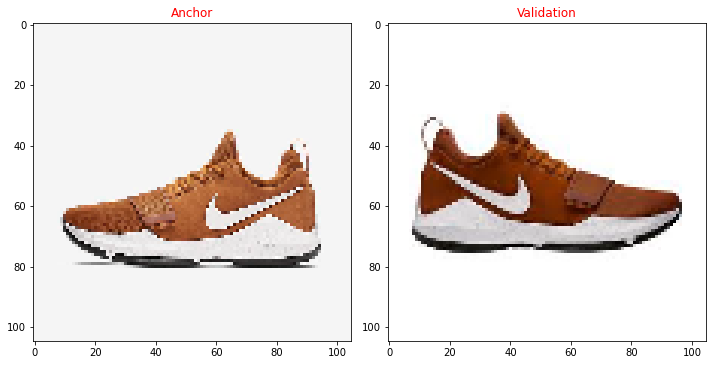

In [46]:
index = 514
anc = data[index][0]
val = data[index][1]
label = data[index][2]

print("\nLabel =", label)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first image on the first subplot
axes[0].imshow(anc)
axes[0].set_title('Anchor', color = 'r')

# Plot the second image on the second subplot
axes[1].imshow(val)
axes[1].set_title('Validation', color = 'r')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with both images
plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 5) Defining train and test data

##### shuffling the elements in data to randomize their order

In [47]:
np.random.shuffle(data)

##### Splitting the data: 80% training data, 20% test data 

In [48]:
m = len(data)
m

1202

In [49]:
train_data = data[:961]
test_data = data[962:]

##### Saving "train_data" and "test_data" arrays into "other data" folder 

In [50]:
np.save("../other data/train_data.npy", train_data)
np.save("../other data/test_data.npy", test_data)